<a href="https://colab.research.google.com/github/CamilaFernandaap/c-digos/blob/main/lancamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10
45
t0.0s -> x: 0.00000m, y: 0.00000m
t0.1s -> x: 0.01745m, y: 0.01745m


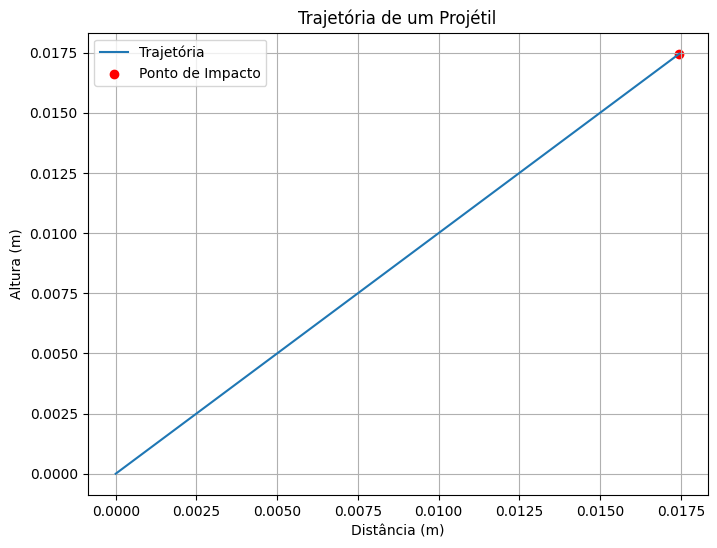

In [13]:
import matplotlib.pyplot as plt


# Constantes
v = float(input())  # velocidade inicial em m/s
theta = float(input())  # ângulo em graus
g = 9.81  # aceleração da gravidade em m/s^2

# Conversão de ângulo para radianos
theta_rad = theta * (3.14159265359 / 180.0)

# Tempo inicial, final e passo
t0 = 0
tN = 100
dt = 0.1

# Número de passos
num_steps = int((tN - t0) / dt)

# Listas para armazenar as posições x e y
x_positions = []
y_positions = []

# Condições iniciais
x = 0
y = 0
vx = v * (3.14159265359 / 180.0) * (1 if theta < 90 else -1)
vy = v * (3.14159265359 / 180.0) * (1 if theta < 90 else -1)

# Método de Euler para integrar as equações de movimento
for _ in range(num_steps):
    x_positions.append(x)
    y_positions.append(y)

    # Calcular novas velocidades e posições
    ax = 0
    ay = -g
    x = x + vx * dt
    y = y + vy * dt

    vx = vx + ax * dt
    vy = vy + ay * dt

    # Verificar se o projétil atingiu o solo (y = 0), onde break interrompe o loop
    if y < 0:
        break

# Imprimir as posições
for i in range(len(x_positions)):
    print(f"t{i * dt:.1f}s -> x: {x_positions[i]:.5f}m, y: {y_positions[i]:.5f}m")

# Plotar a trajetória

plt.figure(figsize=(8, 6))
plt.plot(x_positions, y_positions, label='Trajetória')
plt.scatter(x_positions[-1], y_positions[-1], color='red', label='Ponto de Impacto')
plt.xlabel('Distância (m)')
plt.ylabel('Altura (m)')
plt.title('Trajetória de um Projétil')
plt.legend()
plt.grid(True)
plt.show()


t0.00000s -> x: 0.00000m, y: 0.00000m
t0.10000s -> x: 0.01745m, y: 0.01745m
Estimativa do alcance máximo (xA): 0.00000m


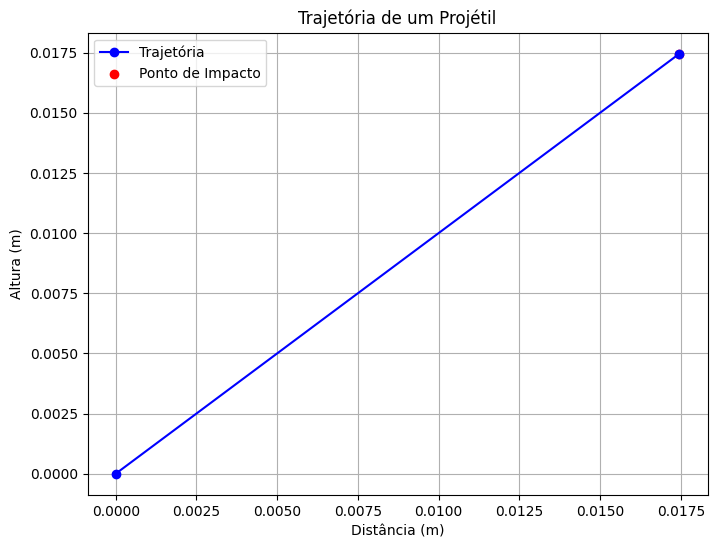

In [14]:
import matplotlib.pyplot as plt

# Constantes
v = 10  # velocidade inicial em m/s
theta = 45  # ângulo em graus
g = 9.81  # aceleração da gravidade em m/s^2

# Conversão de ângulo para radianos
theta_rad = theta * (3.14159265359 / 180.0)

# Passo de tempo
dt = 0.1

# Condições iniciais
x = 0
y = 0
vx = v * (3.14159265359 / 180.0) * (1 if theta < 90 else -1)
vy = v * (3.14159265359 / 180.0) * (1 if theta < 90 else -1)

# Listas para armazenar as posições x e y
x_positions = []
y_positions = []

# Método de Euler para integrar as equações de movimento
while y >= 0:
    x_positions.append(x)
    y_positions.append(y)

    # Calcular novas velocidades e posições
    ax = 0
    ay = -g
    x = x + vx * dt
    y = y + vy * dt

    vx = vx + ax * dt
    vy = vy + ay * dt

# Imprimir as posições
for i in range(len(x_positions)):
    print(f"t{i * dt:.5f}s -> x: {x_positions[i]:.5f}m, y: {y_positions[i]:.5f}m")

# Estimativa do alcance xA usando interpolação linear
if len(x_positions) >= 2:
    xA = x_positions[-2] - y_positions[-2] * (x_positions[-1] - x_positions[-2]) / (y_positions[-1] - y_positions[-2])
    print(f"Estimativa do alcance máximo (xA): {xA:.5f}m")

# Plotar a trajetória
plt.figure(figsize=(8, 6))
plt.plot(x_positions, y_positions, 'b-o', label='Trajetória')
plt.scatter(x_positions[-1], y_positions[-1], color='red', label='Ponto de Impacto')
plt.xlabel('Distância (m)')
plt.ylabel('Altura (m)')
plt.title('Trajetória de um Projétil')
plt.legend()
plt.grid(True)
plt.show()


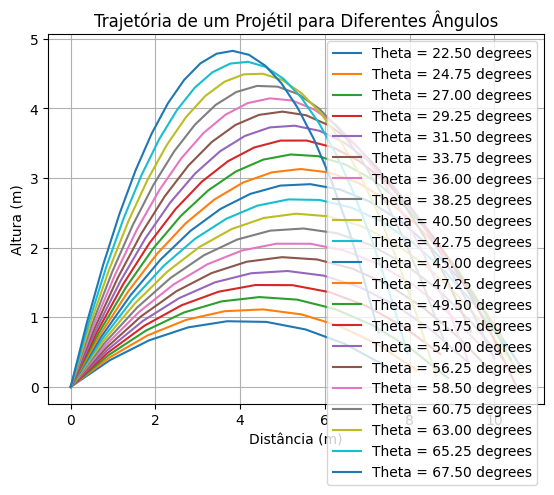

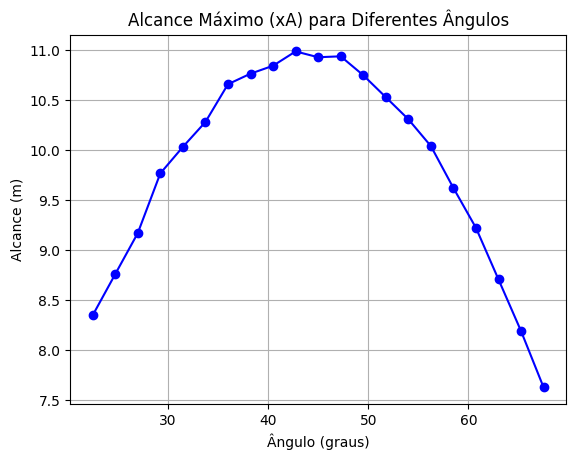

O maior valor do alcance xA encontrado foi: 10.98974m
Isso ocorre para um ângulo de: 42.75 graus


In [15]:
import matplotlib.pyplot as plt
import numpy as np

v = 10  # velocidade inicial em m/s
g = 9.81  # aceleração da gravidade em m/s^2
dt = 0.1  # passo de tempo

# Lista que armazena os valores de xA
vecxA = []

# Loop sobre os valores de theta de π/8 a 3π/8 com passo de π/80
for theta in np.arange(np.pi/8, 3*np.pi/8 + np.pi/80, np.pi/80):

    # Considerando as condições iniciais
    x = 0
    y = 0
    theta_deg = np.degrees(theta)
    vx = v * np.cos(theta)
    vy = v * np.sin(theta)

    # Listas para armazenar as posições x e y
    x_positions = []
    y_positions = []

    # Método de Euler para integrar as equações de movimento
    while y >= 0:
        x_positions.append(x)
        y_positions.append(y)

        # Calcular novas velocidades e posições
        ax = 0
        ay = -g
        x = x + vx * dt
        y = y + vy * dt

        vx = vx + ax * dt
        vy = vy + ay * dt

    # Estimativa do alcance xA usando interpolação linear
    if len(x_positions) >= 2:
        xA = x_positions[-2] - y_positions[-2] * (x_positions[-1] - x_positions[-2]) / (y_positions[-1] - y_positions[-2])
        vecxA.append(xA)

    # Plotar a trajetória para cada ângulo
    plt.plot(x_positions, y_positions, label=f'Theta = {theta_deg:.2f} degrees')

# Gráfico da trajetória para cada ângulo
plt.xlabel('Distância (m)')
plt.ylabel('Altura (m)')
plt.title('Trajetória de um Projétil para Diferentes Ângulos')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico xA vs theta
theta_values = np.arange(np.pi/8, 3*np.pi/8 + np.pi/80, np.pi/80)
plt.plot(np.degrees(theta_values), vecxA, 'bo-')
plt.xlabel('Ângulo (graus)')
plt.ylabel('Alcance (m)')
plt.title('Alcance Máximo (xA) para Diferentes Ângulos')
plt.grid(True)
plt.show()

# Encontrar o maior valor de xA e seu respectivo ângulo
max_xA = max(vecxA)
max_angle = np.degrees(theta_values[vecxA.index(max_xA)])
print(f"O maior valor do alcance xA encontrado foi: {max_xA:.5f}m")
print(f"Isso ocorre para um ângulo de: {max_angle:.2f} graus")
